<a href="https://colab.research.google.com/github/AVnieves/DS595/blob/main/CaseStudy_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lithium-ion Batteries

This case study is based upon the excellent example below:

https://apmonitor.com/pds/index.php/Main/LithiumIonBatteries

Along with its github repository:

https://github.com/APMonitor/pds

and license:

https://github.com/APMonitor/pds/blob/main/LICENSE

In particular, as described on the web page above:

Physical and chemical properties of the Lithium-ion silicate cathodes are used to predict the crystal structure of a Lithium-ion battery material as monoclinic, orthorhombic and triclinic. This case study demonstrates how feature engineering improves the classification results.

![](http://cdn.pixabay.com/photo/2020/01/28/15/18/battery-4800010_960_720.jpg)

**Background:** [Lithium-ion batteries](https://en.wikipedia.org/wiki/Lithium-ion_battery) are commonly used for portable electronics, electric vehicles, and aerospace applications. During discharge, Lithium ions move from the negative electrode through an electrolyte to the positive electrode to create a voltage and current. During recharging, the ions migrate back to the negative electrode. The crystal structure (monoclinic, orthorhombic, triclinic) is available for 339 different chemicals that contain lithium. Available properties are:

| Label | Description |
|------|------|
|   Materials Id  | Unique ID of the material from materialsproject.org |
|   Formula  | Chemical formula of the compound |
|   Space group  | Symmetry group of a three-dimensional crystal pattern |
|   Formation Energy (eV)  | Energy required to produce the material from standard elements |
|   E Above Hull (eV)  | Energy released if compound is decomposed into the most stable compounds |
|   Band Gap (eV)  | Energy range in a solid where no electronic states can exist. A larger band gap indicates that the compound is worse at conducting electricity or heat. |
|   Nsites  | Number of atoms in the unit cell of the crystal |
|   Density (gm/cc)  | Mass per volume of bulk crystalline materials |
|   Volume  | Unit cell volume of the material |
|   Has Bandstructure  | Boolean (True / False) variable for bandstructure |

**Objective:** Predict the crystal structure type (monoclinic, orthorhombic, triclinic) from Lithium-ion physical and chemical compound information.


**References**

Hedengren, J. D. (2021, December 16). Lithium-ion Batteries, Machine Learning for Engineers. Retrieved from https://apmonitor.com/pds/index.php/Main/LithiumIonBatteries

### Import Polymer MFR Data


In [52]:
# install package
# using for variable encoding

try:
    import chemparse
except:
    !pip install chemparse
    print('May need to restart kernel to use chemparse')

Similar to case study 1, the data can be accessed directly by url.

In [53]:
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/lithium_ion.txt'
data = pd.read_csv(url)
data.sample(20)

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
86,mp-762535,Li2Fe2(SiO3)3,P21/c,-2.696,0.072,3.017,64,2.611,899.949,False,monoclinic
332,mp-764452,Li3Co2(SiO4)2,P1,-2.439,0.057,0.230,15,3.024,177.312,True,triclinic
51,mp-762554,Li2FeSiO4,P21/c,-2.603,0.023,3.448,32,3.028,354.961,False,monoclinic
220,mp-863888,Li2Fe(SiO3)2,Pmn21,-2.730,0.076,2.624,66,3.023,731.236,True,orthorhombic
216,mp-868349,LiFeSiO4,Pna21,-2.551,0.070,2.631,28,2.984,344.706,True,orthorhombic
111,mp-767356,LiCo(SiO3)2,C2/c,-2.632,0.058,1.238,20,3.405,212.692,True,monoclinic
284,mp-780147,LiMnSiO4,P1,-2.580,0.098,0.995,28,3.294,310.440,True,triclinic
133,mp-850488,LiCoSiO4,Pc,-2.338,0.098,1.255,28,3.019,347.495,False,monoclinic
282,mp-767982,Li3Mn2(SiO4)2,P1,-2.605,0.090,0.000,15,2.938,177.985,True,triclinic
320,mp-767276,Li5Fe5Si7O24,P1,-2.635,0.084,1.827,41,2.433,610.604,True,triclinic


Still remember the ValueError we met in Case Study 1? Because we forgot to check if there are any null values in the dataset. 

This time, let's do check that first.

![](https://i.pinimg.com/originals/05/ba/0a/05ba0af7235165ec94078d0d6661047f.jpg)

**Recall:**

data.isnull() is used to check if there is null value in the dataset. We can sum them by using sum().

data.info() and data.describe() are usually used to check the properties and basic statistics of the data.

In [54]:
data.isnull().sum().sum()

0

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [56]:
data.describe()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,-2.616950,0.058215,2.079740,38.837758,2.984003,467.765619
std,0.183809,0.030363,1.087968,23.133142,0.353968,292.674559
min,-2.985000,0.000000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,0.035500,1.265500,26.000000,2.760500,286.381500
50%,-2.605000,0.062000,2.499000,31.000000,2.947000,358.537000
75%,-2.525500,0.081500,2.968000,52.000000,3.106000,601.696500
max,-2.012000,0.190000,3.823000,132.000000,4.201000,1518.850000


Great!!! This dataset does not contain any null values. 🙂 Let's start modeling.

# Naive solution

### Classification Modeling
What is the first step? Splitting the training and test set right? 

**Recall:**
The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

In [57]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)

Not sure which column could be a useful feature? Let's start with the naive solution use them all first, except for `Materials Id`, since `Materials Id` is not important in this case.

**Features：**Formula	Spacegroup, Formation Energy (eV), 	E Above Hull (eV), 	Band Gap (eV), 	Nsites, 	Density (gm/cc), 	Volume, 	Has Bandstructure

**label：** Crystal System

In [58]:
from sklearn.tree import DecisionTreeClassifier
method = DecisionTreeClassifier()

In [59]:
model = method.fit(train[['Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume', 'Has Bandstructure']].to_numpy(),train['Crystal System'].to_numpy())

ValueError: ignored

ValueError: could not convert string to float: 'Li4Fe2SiO7'????

![?](https://www.mememaker.net/static/images/memes/4379873.jpg)

What is 'Li4Fe2SiO7'? It looks like a Formula. Why we neet to convert it to float?

Wow! Our model can not handle the string information directly, so we need to convert it to value. Let's check their data type first.


`dtypes` is used to check data's type.

In [ ]:
data.dtypes

It turns out that we need to distinguish the types of variables first. 👀

## **Question 1** **(15 points)**

**Part 1 (5 points)**

What is the differnce between real-valued, ordinal and categorical variables? 

### Part 1 Answer
Real-value data has a numerical value that represents a unit. Real-valued data can easily be processed in machine learning applications since it can be used with mathematical operations without any modifications. Ordinal data has a trend where each data point is related to the other data through an order. It can be numerical or categorical. If it is categorical, it must be converted to a numerical value to use the data for training machine learning models. One instance is student grades in a class. Lastly, categorical data represents features that cannot be described by as numerical values that still are useful for training machine learning models. Examples of categorical data include material of batteries and brand of TVs owned by households. 

**Part 2 (5 points)**  

Why does it matter whether a variable is real-valued, ordinal or categorical? Give an example, and explain why it matters for this example.

### Part 2 Answer
To train machine learning models, all the data must be converted to real-valued data. Real-valued data is the primary form of data format for training machine learning models. An example of ordinal data is student grades in a class, where the values range from A,B,C,D,F where the order of the grades are A>B>C>D>F. Lastly, an exxample of categorical data is the material used in a recipe. This is converted to real-value data by using one-hot encoding. 

**Part 3 (5 points)**  

Identify the data types of the following variables in the dataset:

`Materials Id` -> Ordinal Data          
`Formula` -> Categorical Data            
`Spacegroup` -> Categorical Data         
`Formation Energy (eV)` -> Real-valued Data
`E Above Hull (eV)` -> Real-valued Data    
`Band Gap (eV)` -> Real-valued Data         
`Nsites` -> Real-valued Data                 
`Density (gm/cc)` -> Real-valued Data        
`Volume` -> Real-valued Data                
`Has Bandstructure` -> Categorical Data        
`Crystal System` -> Categorical Data         

Hint: 
Review class notes that can be found on Canvas.

## **Question 1 Answer**

What is the differnce between real-valued, ordinal and categorical variables? 

### Part 1 Answer
Real-value data has a numerical value that represents a unit. Real-valued data can easily be processed in machine learning applications since it can be used with mathematical operations without any modifications. Ordinal data has a trend where each data point is related to the other data through an order. It can be numerical or categorical. If it is categorical, it must be converted to a numerical value to use the data for training machine learning models. One instance is student grades in a class. Lastly, categorical data represents features that cannot be described by as numerical values that still are useful for training machine learning models. Examples of categorical data include material of batteries and brand of TVs owned by households. 

Why does it matter whether a variable is real-valued, ordinal or categorical? Give an example, and explain why it matters for this example.

### Part 2 Answer
To train machine learning models, all the data must be converted to real-valued data. Real-valued data is the primary form of data format for training machine learning models. An example of ordinal data is student grades in a class, where the values range from A,B,C,D,F where the order of the grades are A>B>C>D>F. Lastly, an exxample of categorical data is the material used in a recipe. This is converted to real-value data by using one-hot encoding. 

### Part 3 Answer
Identify the data types of the following variables in the dataset:

`Materials Id` -> Ordinal Data          
`Formula` -> Categorical Data            
`Spacegroup` -> Categorical Data         
`Formation Energy (eV)` -> Real-valued Data
`E Above Hull (eV)` -> Real-valued Data    
`Band Gap (eV)` -> Real-valued Data         
`Nsites` -> Real-valued Data                 
`Density (gm/cc)` -> Real-valued Data        
`Volume` -> Real-valued Data                
`Has Bandstructure` -> Categorical Data        
`Crystal System` -> Categorical Data         


In [60]:
# Separate into numerical features that don't need preprocessing, and categorical features that need to be transformed
num_feat = data.select_dtypes(include=['int64','float64']).columns
cat_feat = data.select_dtypes(include=['object','bool']).columns

In [61]:
num_feat

Index(['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites',
       'Density (gm/cc)', 'Volume'],
      dtype='object')

In [62]:
cat_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

Still remember how to use heatmap and pair plot to show the correlation between variables? Let's discover the correlation of all numerical variables.

**Recall:**

sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)

sns.pairplot(data)




In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

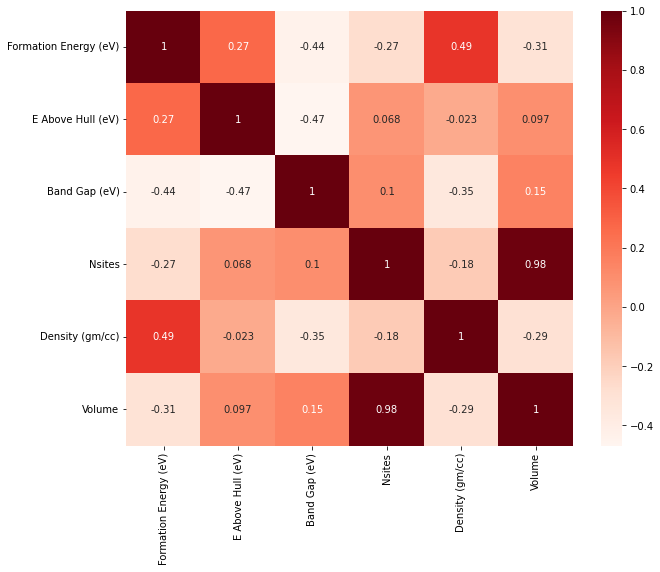

In [64]:
plt.figure(figsize=(10,8))
cor = data[num_feat].corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

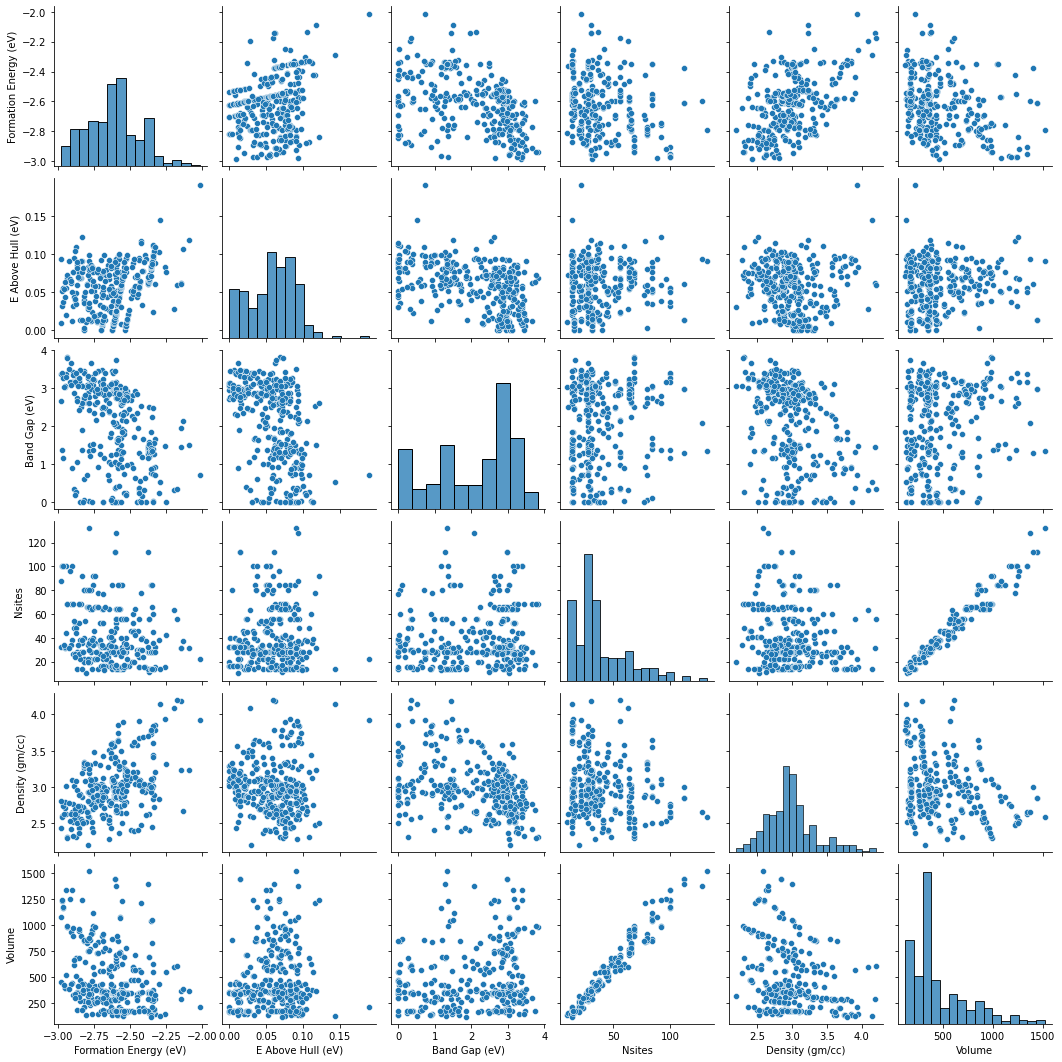

In [65]:
sns.pairplot(data[num_feat])

## **Question 2** **(15 points)**

**Part 1** (5 points)
Find the two **most** positively correlated variables. Why do you think they are relevant for predicting one variable based on the other variable? 

**Part 2** (5 points)
Find the two **least** correlated variables (i.e., the two variables with correlation closest to 0) . Why do you think they are **not** relevant for predicting one variable based on the other variable? 

**Part 3** (5 points)
What about negative correlations?  Are two variables that are very negatively correlated predictable from each other?


## Question 2 Answer
### Part 1
THe two most positively correlated variables are volume and Nsites. The volume is the unit cell volume of the material, and the Nsites indicates the number of atoms in the unit cell of the crystal. This make sense because the number of atoms in the crystal indicates a higher volume of the material per unit cell. 

### Part 2
The two least correlated variables are the E above hull and the Nsites features. E above hull represents the energy released if compound is decomposed into the most stable compounds. Nsites indicates the number of atoms in the unit cell of the crystal. A reason for low correlation might be that the E above hull feature represents the energy released by the battery where the Nsites indicates the number of the atoms in the crystal therefore the energy released in decomposition is not related to the number of atoms in the crystal.

### Part 3
Negative correlations are just as useful as their positive correlations counterparts. A highly negative correlated pair of features indicates that the features are highly inversely proportionally related. Therefore, two highly negative correlated variables are predictable from each other. 

Okay, now I know which variables are numerical and which are categorical. Since categorical ones bring ValueErrors, can we just use numerical ones? Let's give it a try.

In [66]:
method = DecisionTreeClassifier()
model = method.fit(train[num_feat].to_numpy(),train['Crystal System'].to_numpy())

Great!!! The model was successfully fit！ 🙂 Now, we can evaluate the performance on test set.

In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [68]:
predicted_label=model.predict(test[num_feat].to_numpy())
groundtruth_label=test['Crystal System'].to_numpy()

accuracy=accuracy_score(predicted_label,groundtruth_label)

macro_precision=precision_score(predicted_label,groundtruth_label,average='macro')
micro_precision=precision_score(predicted_label,groundtruth_label,average='micro')

macro_recall=recall_score(predicted_label,groundtruth_label,average='macro')
micro_recall=recall_score(predicted_label,groundtruth_label,average='micro')

macro_f1=f1_score(predicted_label,groundtruth_label,average='macro')
micro_f1=f1_score(predicted_label,groundtruth_label,average='micro')

from tabulate import tabulate
results = [
["accuracy", accuracy],
["macro_precision", macro_precision],
["micro_precision",micro_precision],
["macro_recall",macro_recall],
["micro_recall",micro_recall],
["macro_f1",macro_f1],
["micro_f1",micro_f1],
] 
print (tabulate(results, headers=["Metrics", "Values"]))

Metrics            Values
---------------  --------
accuracy         0.514706
macro_precision  0.49531
micro_precision  0.514706
macro_recall     0.510417
micro_recall     0.514706
macro_f1         0.496135
micro_f1         0.514706


Ok, we already see things are interesting. There are several different metrics (accuracy, precision, recall, f1)! Hmmm....

Here is a great tutorial to help you out.

https://androidkt.com/micro-macro-averages-for-imbalance-multiclass-classification/#:~:text=Macro%20average%20deals%20with%20aggregates%20or%20totals%2C%20macro,price%20levels%2C%20and%20gross%20domestic%20product%20or%20GDP.

Part of this class is learning to be able to use outside resources to learn more about these topics.  Here is a chance to get some practice 😀

## **Question 3** **(10 points)**

**Part 1 (5 points)**

What do **original (binary)** accuracy, precision, recall and f1 mean? How are they counted?

**Part 2 (5 points)**  

What do **macro/micro** precision, recall and f1 mean? How are they counted? Why do we use macro/micro metrics here instead of original binary ones? 


## Question 3 Answer
### Part 1
Accuracy: Is the number of true samples divided by the number of true and false samples. 

$(TP + TN)/(TP + TN + FP + FN)$

Precision: Is the true positives divided by true positives plus false positives. 

$ TP/(TP + FP)$

Recall: Is the true positives divided by the true positives plus the false negatives. 

$TP / (TP + FN)$

F1: Harmonic mean of precision and recall. 

$ 2TP / (2 TP + FP + FN)

### Part 2:
The term Macro and Micro are terms for statistics that are used to study multiple classes of models
versus studying each sample of the class.

**Macro Precision:** Is the precision average of individually calculated precisions for each class.

\begin{equation}
\frac{1}{N} \sum_{i=1}^{N} Prec_i
\end{equation}

where i is the class index and N is the number of classes.

**Micro Precision:** Takes the numerically counted true positives and false positives to calculate the
precision.

\begin{equation}
\frac{\sum_{i=1}^{N} TP_i}{\sum_{i=1}^{N} TP_i + \sum_{i=1}^{N} FP_i}
\end{equation}

where i is the sample index and N is the number of classes.

**Macro Recall:** Is the accuracy average of the individually calculated accuracies for each class.

\begin{equation}
\frac{1}{N} \sum_{i=1}^{N} Rec_i
\end{equation}

where i is the class index and N is the number of classes.

**Micro Recall:** Is calculated by taking the numerical counts of the true positives and the false
negatives.

\begin{equation}
\frac{\sum_{i=1}^{N} TP_i}{\sum_{i=1}^{N} TP_i + \sum_{i=1}^{N} FN_i}
\end{equation}

where i is the class index and N is the number of classes.

**Macro F1:** Is calculated by taking the average F1 score between two classes.

\begin{equation}
F1_{micro} = \frac{1}{N} \sum_{i=1}^{N} F1
\end{equation}

**Micro F1:** Is the weighted score of each F1 score where the weights represent the distribution
of the data for each class.
\begin{equation}
F1_{micro} = \hat{F1} \cdot \hat{X}
\end{equation}
where is a vector of the F1 scores where each element is the F1 score for that class and 
is the distribution of data for each class.


# Solution with Feature Engineering

![?](https://www.mememaker.net/static/images/memes/4751028.jpg)

Notice that you dropped all the categorical variables. Are these variables really not useful for classification? Let's encode these variables to allow them to be fit into the model. Then, we can see if they can impact the performance of the task.

### Categorical encoding methods
<a id='Categorical_encoding_methods'></a>

#### 1. One Hot Encoding
Method: Encode each category value into a binary vector, with size = # of distinct values. See https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

Example: Has Bandstructure column has 2 distinct values, True and False. Create a new column where 1 = True and 0 = False.

Pros: simple and rugged method to get categorical features into unique and useful numerical features

Cons: m unique values results in m unique new features. This is fine when there are only 2-3 unique values (such as hi/lo, yes/no), but creates issues when there are more. Can't handle new categories that weren't in training data, and easily overfit. Sparse data.

#### 2. Encode to ordinal variables
Method: assign each unique value to a unique number. 

Example: Spacegroup = Pc is assigned to 0, Spacegroup = P21/c is assigned to 1, etc. 

Pros: simple and quick, 1 column in -> 1 column out

Cons: residual "structure" (number assigned is arbitrary, and it leads algorithms to assume that a Spacegroup with a value of 20 is higher value than a Spacegroup of value 1)

#### 3. Feature Hashing
Method: Encode each unique category into a non-binary vector

Example: Spacegroup = Pc is assigned to [1,0,0], Spacegroup = P21/c is assigned to [1,2,-1], etc. Specify number of columns (length of vector)

Pros: low dimensionality so really efficient.

Cons: potential collisions (for example the 1st value in example has both Spacegroups sharing a '1'); hashed features aren't interpretable so can't be used in feature importance. **How do you come up with hashes to preserve distances!?**

#### 4. Other methods
Primarily involve prior knowledge about dataset. Encode with own algorithm to include closely related features.

Variation on One Hot Encoding for large numbers of unique values: classify infrequent instances into "rare" category. May lose some granularity and important info, but also allows for new categories that aren't in training data

Now, let's explore categorical variables one by one.

In [69]:
cat_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

### `'Materials Id'` column

In [70]:
data['Materials Id'].describe()

count           339
unique          339
top       mp-849394
freq              1
Name: Materials Id, dtype: object

339 unique values for 339 unique entries; there is no useful information in this column and it can be dropped.

## **Question 4** **(5 points)**

Why can this column be dropped?  I.e., why is a column with all different categorical values (and no prior information) not useful?



In [71]:
data.drop(columns=['Materials Id'],inplace=True)
data.columns

Index(['Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)',
       'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume',
       'Has Bandstructure', 'Crystal System'],
      dtype='object')

## Question 4 Answer
No outputs share values with this feature therefore it cannot be used as a method of prediction. It
only classifies a single value. This will decrease the performance of the classification algorithm
since this feature states that there are N number of distinct classes within the dataset. This does
not add any learned information to the other features that will learn some method to disntiguish the
data points into classes.

### `'Has Bandstructure'` column

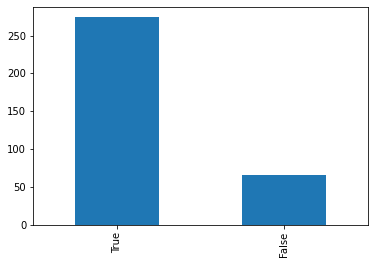

In [72]:
data['Has Bandstructure'].value_counts().plot(kind='bar')

2 unique values, True and False. Classic example of when to use one-hot encoding

In [73]:
# One-hot encode 'Has Bandstructure'
data['Has Bandstructure'] = data['Has Bandstructure'].map({True:1, False:0})

### `'Spacegroup'` column

44


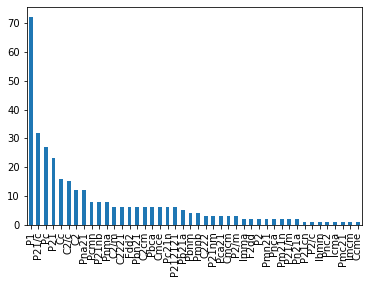

In [74]:
data['Spacegroup'].value_counts().plot(kind='bar')
print(data['Spacegroup'].nunique())

44 unique values, with most of them occuring multiple times

**Option 1:** One-hot encoding will result in 44 new feature columns; inefficient and memory-intensive.

**Option 2:** Encode to ordinal numbers. Will possibly work, but does leave a residual structure that may affect model performance

**Option 3:** Use Feature Hashing to create a vector representation of each unique Spacegroup. Note that if vector size = 44, it's the same as one-hot encoding, and if vector size = 1, it's the same as encoding to ordinal variables. What other vector size might be useful?  3 or 4?

In [75]:
# Option 1: One-hot encoding (not used)
pd.get_dummies(data['Spacegroup'])

,C2,C2/c,C2/m,C222,C2221,C2cm,Cc,Ccme,Cmce,Cmcm,...,Pcmn,Pm21n,Pmc21,Pmn21,Pmnb,Pn21a,Pna21,Pnc2,Pnca,Pnma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Option 2: Ordinal number encoding
data['Spacegroup (ordinal)'] = pd.factorize(data['Spacegroup'])[0]

# Can also order by most common to least common
data['Spacegroup'].rank(method="dense").astype(int)

0      32
1      22
2       7
3       2
4       2
       ..
334    17
335    17
336    17
337    17
338    17
Name: Spacegroup, Length: 339, dtype: int64

In [77]:
# Option 3: Feature Hashing
from sklearn.feature_extraction import FeatureHasher
n = 3
fh = FeatureHasher(n_features=n, input_type='string')
hashed_tag = fh.fit_transform(data['Spacegroup']).toarray()
ht_df = pd.DataFrame(hashed_tag)
ht_df.columns = ['Spacegroup'+str(i) for i in range(n)]

data = data.join(ht_df)

### `'Formula'` column

In [78]:
data['Formula'].value_counts()

LiFeSiO4           42
LiCoSiO4           29
Li2FeSiO4          15
Li2CoSiO4          14
Li2MnSiO4          12
                   ..
Li3Co2Si3O10        1
Li10Co(SiO5)2       1
Li4Co2Si3O10        1
Li2FeSi4O11         1
Li5Co4(Si3O10)2     1
Name: Formula, Length: 114, dtype: int64

114 unique values, most only occuring once. One-hot encoding is out of the question

**Option 1,2,3:** one-hot encoding, ordinal number encoding, and feature hashing all become inefficient with such variety.

**Option 4:** Use domain knowledge to create additional features. For example, we can look at the LiFeSiO4 formula, and turn it into 4 new columns, each one indicating how many of each atom are in the formula (for example, {Li: 1, Fe: 1, Si: 1, O: 4})

In [79]:
# Option 4: use chemparse package to create the new features of atom counts
import chemparse
chem_data = data['Formula'].apply(chemparse.parse_formula)

# Convert the dictionary into a dataframe and fill NaN's with zero's
chem_data = pd.json_normalize(chem_data)
chem_data = chem_data.fillna(0)

data = data.join(chem_data)

### `'Crystal System'` column
This is the target column, and there are 3 different types of crystal structures we're trying to classify. To properly transform this to numerical data, we have to understand if we are working on a multi-class problem or a multi-label problem.

- A multi-class problem is one in which there is only one distinct type of classification for each row. For example, a fruit is either an apple or an orange, but cannot be both. For a multi-class problem, the target value should be a single value, such as a 0 for apple and 1 for orange. In other words, it would be encoded to ordinal numbers.
- A multi-label problem is one in which there are possibly multiple labels for each row. For example, classifying pictures of apples and oranges can include a picture of an apple alone, an orange alone, or both an apple and an orange. For a multi-label problem, the target value should be a vector representation, such as [1,0] for apple, [0,1] for orange, and [1,1] for both apple and orange. In other words, we would have to one-hot encode the target feature.

Since the crystal system structure is unique, this is a multi-class problem. The target output should be encoded to a 0, 1, or 2. If it were a multi-label problem, the target output would have to be encoded to a vector of length 3. 

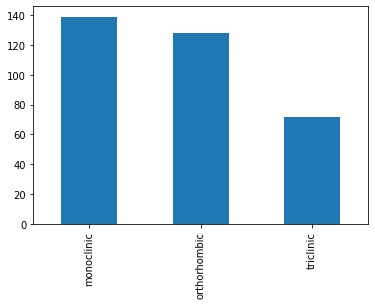

In [80]:
# Check for balance
data['Crystal System'].value_counts().plot(kind='bar')

In [81]:
# Encode Crystal System to ordinal values for multi-class problem
data['Crystal System (#)'] = data['Crystal System'].map({'monoclinic':0, 'orthorhombic':1, 'triclinic':2})

### Test performance

In [82]:
# All new numerical features (Crystal System excluded, since it's int32)
features = list(data.select_dtypes(include=['int64','float64']).columns.values)

ord_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Spacegroup (ordinal)','Li','Mn','Si','O','Fe','Co'
           ]

hash_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
             'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
             'Spacegroup0','Spacegroup1','Spacegroup2',
             'Li','Mn','Si','O','Fe','Co'
            ]

labels = ['Crystal System (#)']

In [83]:
titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])


In [84]:
print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.485294 |          0.458273 |          0.485294 |       0.465051 |       0.485294 |   0.451243 |   0.485294 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   1        |          1        |          1        |       1        |       1        |   1        |   1        |
| (Ordinal Spacegroup)             |            |                   |                   |           

Want to check the accuracy of each class? We can use the confusion matrix to show the results.

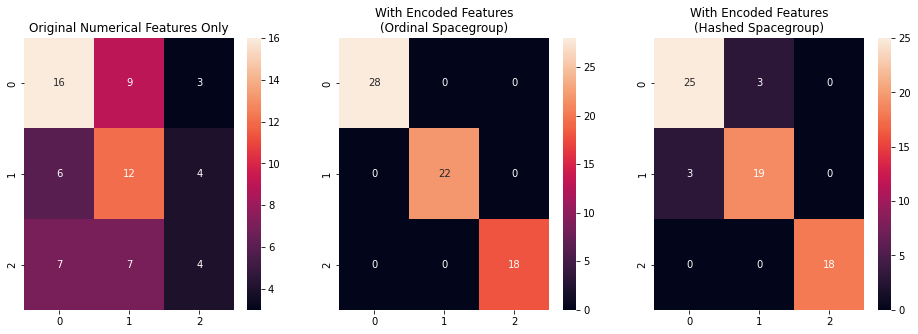

In [85]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

## **Question 5** **(10 points)**

Based on the above metrics table and confusion matrix, which feature engineering technique performs best and why?


## Question 5 Answer
Based on the metrics table and the confusion matrix, the best performing feature engineering
technique is the Encoded Features with Ordinal Spacegroup. Looking at the base line with the
original numerical features only, the confusion matrix shows that there model mistakes the crystal
system number with regularity. For instance, the crystal system number 0 is mistakenly identified as
"1" six times and as 2 nine times and accurately identifies crystal system number 0 sixteen times.

The second confusion matrix with ordinal spacegroup feature engineering, the confusion matrix
indicates that for each test output on the test data, the model created does not mistakenly identify
any of the crystal system numbers.

The third confusion matrix with hashed spacegroup features mistakenly identifes spacegroup 1 as
spacegroup 0 three times.
Looking at the metric table, it is confirmed that the accuracy, macro/micro recall, macro/micro
precision, and macro/micro F1 score is 1 for the ordinal spacegroup.

## **Question 6** **(15 points)**
Try two different methods such as `linear_model.LogisticRegression`, `neighbors.KNeighborsClassifier` or `ensemble.RandomForestClassifier`. Report your results.
Can you achieve better performance than any of the previous models? Why do these methods perform better/worse than the decision tree?





## Question 6 Answer
The results show that logistic regression performs almost as well using the ordinal encoded data for the spacegroups when compared to the decision tree classifier. The correlation matrix shows that only one batery type in the test data was mislabeled. The other model that was trained was a KNN model with K = 3. Using the ordinal encoded data set, this model performed slightly worse with a slightly lower accuracy compared to the logistic regression. This is because the data is not normalized. 

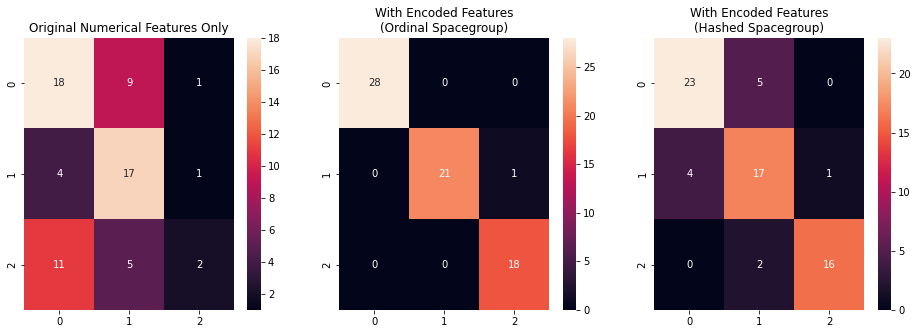

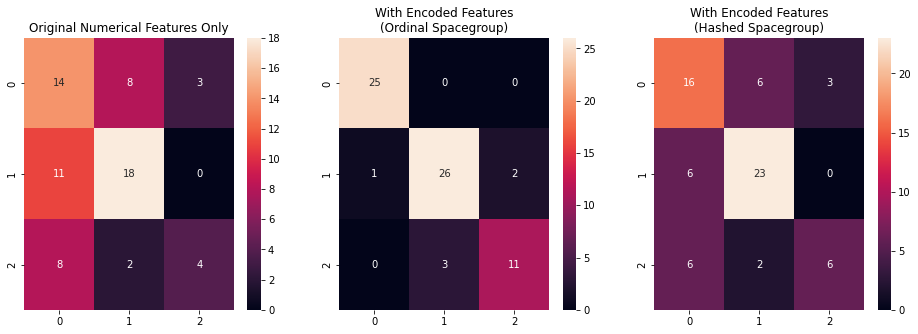

In [86]:
from inspect import modulesbyfile
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
plt.figure(figsize=(16,5))
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
  X = data[feat]
  y = data[labels]
  #80% training data and 20% testing
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
  # change to your selected model
  model = LogisticRegression(max_iter=10000)
  model.fit(Xtrain,ytrain.values.ravel())
  yp = model.predict(Xtest)
  plt.subplot(1,3,i+1)
  cm = confusion_matrix(ytest,yp)
  sns.heatmap(cm,annot=True)
  plt.title(titles[i])
plt.show()

plt.figure(figsize=(16,5))
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
  X = data[feat]
  y = data[labels]
  #80% training data and 20% testing
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=2)
  # change to your selected model
  model = KNeighborsClassifier(n_neighbors=3)
  model.fit(Xtrain,ytrain.values.ravel())
  yp = model.predict(Xtest)
  plt.subplot(1,3,i+1)
  cm = confusion_matrix(ytest,yp)
  sns.heatmap(cm,annot=True)
  plt.title(titles[i])
plt.show()




# Solution with Feature Engineering + rebalance dataset

![](https://media.makeameme.org/created/today-rebalance.jpg)

Let's review the distribution of `Crystal System` again. It is clear that the three class is unbalanced. Dealing with imbalanced data is common in classification problems because such imbalance usually affects the performance of the model.

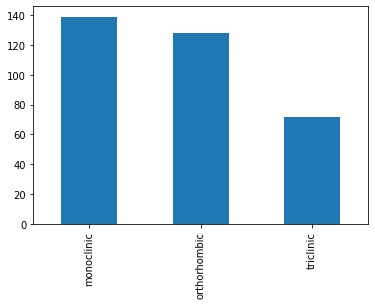

In [87]:
# Check for balance
data['Crystal System'].value_counts().plot(kind='bar')

Here, we use apply undersampling to `monoclinic` and `orthorhombic` so that they have the same number as `triclinic`.

In [88]:
monoclinic_data=data[data['Crystal System'] == 'monoclinic']
orthorhombic_data=data[data['Crystal System'] == 'orthorhombic']
triclinic_data=data[data['Crystal System'] == 'triclinic']

monoclinic_data_sampled = monoclinic_data.sample(n=len(triclinic_data))
orthorhombic_data_sampled = orthorhombic_data.sample(n=len(triclinic_data))

data_rebalanced=triclinic_data.append(monoclinic_data_sampled).append(orthorhombic_data_sampled).reset_index(drop=True)

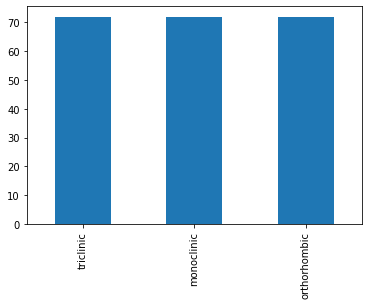

In [89]:
# Check for balance
data_rebalanced['Crystal System'].value_counts().plot(kind='bar')

Now that the dataset has been rebalanced, let's see if this affects the performance of the model.

## **Question 7** **(15 points)**
Redo the calculations, using the above `data_rebalanced` dataset. Report results and compare the results with the original(imbalance) dataset. Will rebalancing the data improve performance? Why?





## Question 7 Answer
Based on the results below, the random forest and the logistic regression both have perfect accuracy when using the ordinal encoded categorical feature spacegroup. K Nearest Neighbor did not perform well. This is due to the fact that the number of feature used in the KNN does not have enough data to fit a good model. Additionally, the data is not normalized therefore the distance calculation does not match when learning the model. The balanced data shows improvement in the model. Using a logistical regression, the accuracy was perfect where as the logistical regression, the imbalanced data was not perfectly accurate. To compare the models, a new random seed was selected to avoid data snooping and overfitting. The balanced data shows improvement because the clustering isn't prone to overfitting due to the fact that there is equal amounts of data. 

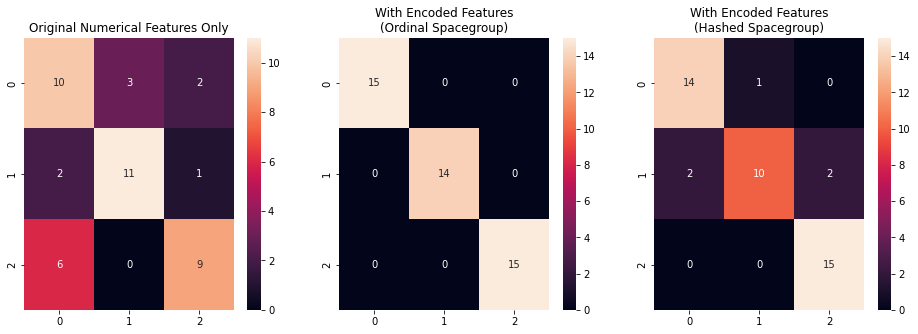

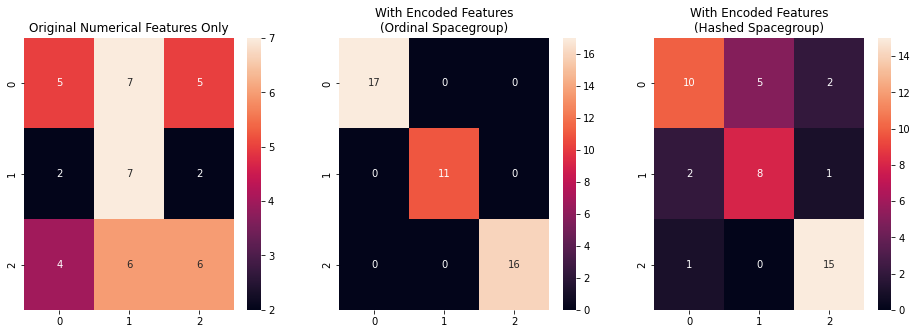

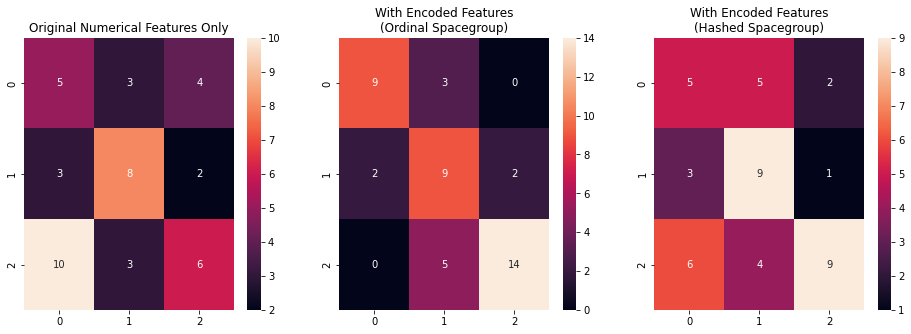

In [90]:
plt.figure(figsize=(16,5))
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
  # change to rebalanced dataset: data_rebalanced
  X = data_rebalanced[feat]
  y = data_rebalanced[labels]
  # 80% training data and 20% testing
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=3)
  dtree = DecisionTreeClassifier()
  dtree.fit(Xtrain,ytrain)
  yp = dtree.predict(Xtest)
  plt.subplot(1,3,i+1)
  cm = confusion_matrix(ytest,yp)
  sns.heatmap(cm,annot=True)
  plt.title(titles[i])
plt.show()

plt.figure(figsize=(16,5))
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
  X = data_rebalanced[feat]
  y = data_rebalanced[labels]
  #80% training data and 20% testing
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=4)
  # change to your selected model
  model = LogisticRegression(max_iter=10000)
  model.fit(Xtrain,ytrain.values.ravel())
  yp = model.predict(Xtest)
  plt.subplot(1,3,i+1)
  cm = confusion_matrix(ytest,yp)
  sns.heatmap(cm,annot=True)
  plt.title(titles[i])
plt.show()

plt.figure(figsize=(16,5))
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
  X = data_rebalanced[feat]
  y = data_rebalanced[labels]
  #80% training data and 20% testing
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
  # change to your selected model
  model = KNeighborsClassifier(n_neighbors=7)
  model.fit(Xtrain,ytrain.values.ravel())
  yp = model.predict(Xtest)
  plt.subplot(1,3,i+1)
  cm = confusion_matrix(ytest,yp)
  sns.heatmap(cm,annot=True)
  plt.title(titles[i])
plt.show()


# Solution with Feature Engineering + dimensionality reduction

![](https://i.ytimg.com/vi/hSDinYYObd4/maxresdefault.jpg)

Remember the mysterious technology Principal Component Analysis (PCA) that was mentioned the lecture? Forgotten? Go review it, because it may appear on your midterm/final exam. 👀

Now, let's see how PCA works in the classification task. 
PCA performs better with a normalized feature set. We will perform standard scalar normalization to normalize our feature set first using `StandardScaler` and then apply `PCA`.

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.544118 |          0.562169 |          0.544118 |       0.564949 |       0.544118 |   0.560335 |   0.544118 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.676471 |          0.69228  |          0.676471 |       0.676162 |       0.676471 |   0.680891 |   0.676471 |
| (Ordinal Spacegroup)             |            |                   |                   |           

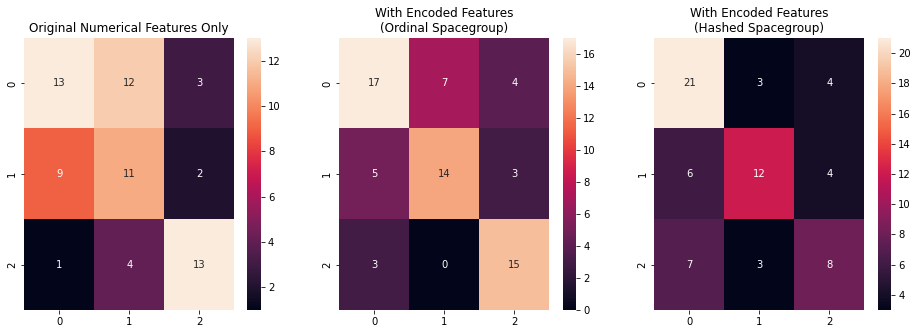

In [92]:
plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **Question 8** **(15 points)**

**Part 1 (5 points)**

How does PCA perform dimensionality reduction? Is it valid for numerical variables? Why? Is it valid for ordinal variable? Why? Is it valid for categorical variable? Why?

**Part 2 (10 points)**

Try different numbers of principal components (eg. `n_components=1,2,3,4`) on different methods (eg. `LogisticRegression`, `KNeighborsClassifier` or `naive_bayes` ), and report the results.

Does the classification effect increase as the number of principal components increases? Why?


## Question 8 Answer
### Part 1
**PCA Performing Dimensionality Reduction:** PCA calculates the eigenvalue and eigenvector of each
feature in the dataset. The eigenvalue indicates the most important features based on the size of
the eigenvalue. Based on the size of the eigenvalues, the dimensionality of the model can be
reduced by indicating the number of dimensions the model should be built.
**Is PCA valid for Numerical Variables and Why?** PCA is valid for numerical variables becuase each
numerical feature is represented as a single dimension in the model.
**Is PCA valid for Ordinal Variables and Why?** PCA is valid for ordinal variables because it can be
described as a numerical variable which represents a single dimension in the model.
**Is PCA valid for Categorical Variables and Why?** PCA is valid for categorical variables that are
encoded. PCA will work for categorical variables that are ordinal encoded. One-hot encoding and
feature hashing encode the categorical features into new features for the model to learn. Using PCA
algorithm might separate the weight of the features to reduce dimesionality.
### Part 2
This section includes 2 test where the number of principle components was varied from 1 to 6 for logistic regression classification and K nearest neighbors classification methods. With the original numerical features, the ability to classify increase in performance with up to 3 features, but then decreases in performance as the PCA component number increases and finally plateaus when itreaches PCA with six components.

With encoded features using ordinal spacegroup, the performance increases with more PCA components and does not plateau. This is because the singular value for the first 6 components are very high and do not drop off. The prediction does not plateau because the features has increased due to the encoding method of the spacegroup feature.

Lastly, with encoded features using hashed space group, the performance continually increases with more PCA components and does not plateau. This is because the number of features has been increased do to the encoding method of the spacegroup feature. 

Overall the best performing model is the data with the ordinal space group encoded features with PCA of 6 components using logistic regression.


Number of Components: 1
Model Type: LogisticRegression
Original Numerical Features Only
Num Features: 6
PCA Singular Values: [22.34111542]


Number of Components: 1
Model Type: LogisticRegression
With Encoded Features
(Ordinal Spacegroup)
Num Features: 14
PCA Singular Values: [27.0744101]


Number of Components: 1
Model Type: LogisticRegression
With Encoded Features
(Hashed Spacegroup)
Num Features: 16
PCA Singular Values: [27.02555357]


Number of Components: 2
Model Type: LogisticRegression
Original Numerical Features Only
Num Features: 6
PCA Singular Values: [22.34111542 19.4320703 ]


Number of Components: 2
Model Type: LogisticRegression
With Encoded Features
(Ordinal Spacegroup)
Num Features: 14
PCA Singular Values: [27.0744101  23.93264231]


Number of Components: 2
Model Type: LogisticRegression
With Encoded Features
(Hashed Spacegroup)
Num Features: 16
PCA Singular Values: [27.02555357 23.56862371]


Number of Components: 3
Model Type: LogisticRegression
Original Numerical Fea

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA Singular Values: [22.34111542 19.4320703  14.59775552 10.97215335]


Number of Components: 4
Model Type: LogisticRegression
With Encoded Features
(Ordinal Spacegroup)
Num Features: 14
PCA Singular Values: [27.0744101  23.93264231 19.68975199 17.49523624]


Number of Components: 4
Model Type: LogisticRegression
With Encoded Features
(Hashed Spacegroup)
Num Features: 16
PCA Singular Values: [27.02555357 23.56862371 19.74254883 17.50059103]


Number of Components: 5
Model Type: LogisticRegression
Original Numerical Features Only
Num Features: 6
PCA Singular Values: [22.34111542 19.4320703  14.59775552 10.97215335  9.12458785]


Number of Components: 5
Model Type: LogisticRegression
With Encoded Features
(Ordinal Spacegroup)
Num Features: 14
PCA Singular Values: [27.0744101  23.93264231 19.68975199 17.49523624 15.11873526]


Number of Components: 5
Model Type: LogisticRegression
With Encoded Features
(Hashed Spacegroup)
Num Features: 16
PCA Singular Values: [27.02555357 23.56862371 19.

<Figure size 1152x360 with 0 Axes>

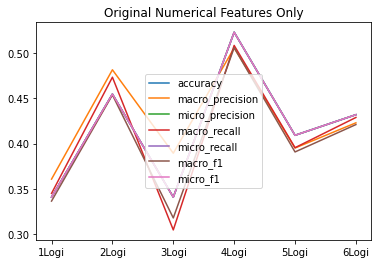

[[0.5, 0.4883040935672514, 0.5, 0.35042735042735046, 0.5, 0.39165481270744423, 0.5], [0.5, 0.459289248762933, 0.5, 0.46438746438746437, 0.5, 0.46148302148302145, 0.5], [0.5681818181818182, 0.5016869095816464, 0.5681818181818182, 0.49025974025974023, 0.5681818181818182, 0.49444444444444446, 0.5681818181818182], [0.7272727272727273, 0.6854475933423302, 0.7272727272727273, 0.6851851851851851, 0.7272727272727273, 0.6807081807081806, 0.7272727272727273], [0.6818181818181818, 0.636302294197031, 0.6818181818181818, 0.6333333333333333, 0.6818181818181818, 0.6343589743589744, 0.6818181818181818], [0.8409090909090909, 0.8264732343679712, 0.8409090909090909, 0.8439153439153438, 0.8409090909090909, 0.8244755244755245, 0.8409090909090909]]


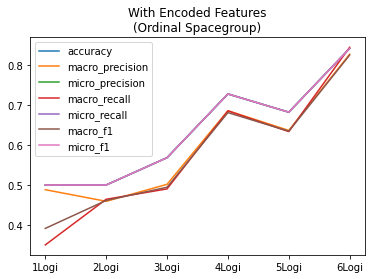

[[0.4090909090909091, 0.4053081421502474, 0.4090909090909091, 0.4166666666666667, 0.4090909090909091, 0.4076190476190476, 0.4090909090909091], [0.38636363636363635, 0.36347278452541615, 0.38636363636363635, 0.3955026455026455, 0.38636363636363635, 0.3709090909090909, 0.38636363636363635], [0.6590909090909091, 0.6247188484030589, 0.6590909090909091, 0.6311291048133153, 0.6590909090909091, 0.6273684210526316, 0.6590909090909091], [0.5909090909090909, 0.5516194331983806, 0.5909090909090909, 0.5515873015873015, 0.5909090909090909, 0.5511344678011345, 0.5909090909090909], [0.6818181818181818, 0.6584570400359874, 0.6818181818181818, 0.6547619047619048, 0.6818181818181818, 0.6560727394060728, 0.6818181818181818], [0.7727272727272727, 0.7571974808816915, 0.7727272727272727, 0.7528619528619528, 0.7727272727272727, 0.7530916009176879, 0.7727272727272727]]


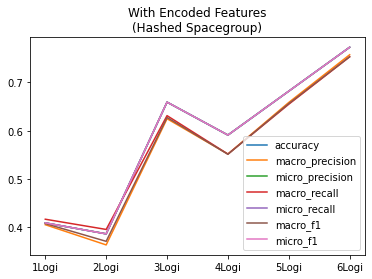

Number of Components: 1
Model Type: KNeighborsClassifier
Original Numerical Features Only
Num Features: 6
PCA Singular Values: [22.34111542]


Number of Components: 1
Model Type: KNeighborsClassifier
With Encoded Features
(Ordinal Spacegroup)
Num Features: 14
PCA Singular Values: [27.0744101]


Number of Components: 1
Model Type: KNeighborsClassifier
With Encoded Features
(Hashed Spacegroup)
Num Features: 16
PCA Singular Values: [27.02555357]


Number of Components: 2
Model Type: KNeighborsClassifier
Original Numerical Features Only
Num Features: 6
PCA Singular Values: [22.34111542 19.4320703 ]


Number of Components: 2
Model Type: KNeighborsClassifier
With Encoded Features
(Ordinal Spacegroup)
Num Features: 14
PCA Singular Values: [27.0744101  23.93264231]


Number of Components: 2
Model Type: KNeighborsClassifier
With Encoded Features
(Hashed Spacegroup)
Num Features: 16
PCA Singular Values: [27.02555357 23.56862371]


Number of Components: 3
Model Type: KNeighborsClassifier
Original

<Figure size 1152x360 with 0 Axes>

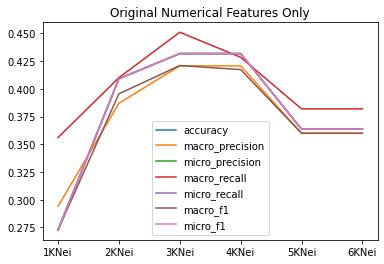

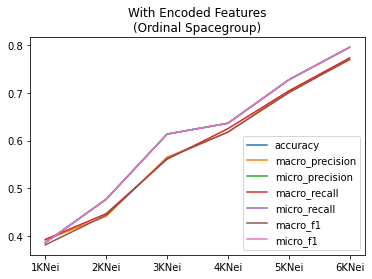

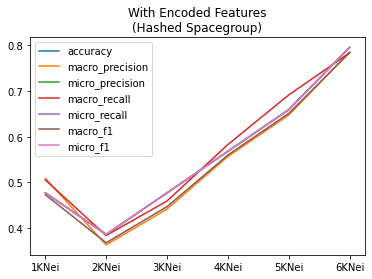

In [93]:
titles = ['Original Numerical Features Only',
'With Encoded Features\n(Ordinal Spacegroup)',
'With Encoded Features\n(Hashed Spacegroup)'
]
def do_pca(n_components, model):
  results=[]
  #plt.figure(figsize=(16,5))
  for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    print("Number of Components: " + str(n_components))
    print("Model Type: " + type(model).__name__)
    print(titles[i])
    print("Num Features: " + str(len(feat)))
    print_str = str(n_components) + type(model).__name__
    X = data_rebalanced[feat]
    y = data_rebalanced[labels]
    sc = StandardScaler()
    pca = PCA(n_components=n_components) # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)
    print("PCA Singular Values: " + str(pca.singular_values_))
    print(); print()
    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    #dtree = DecisionTreeClassifier()
    model.fit(Xtrain,ytrain.values.ravel())
    yp = model.predict(Xtest)
    accuracy=accuracy_score(yp,ytest)
    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')
    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')
    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')
    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
  return results, print_str

model_LR = LogisticRegression(max_iter=10000)
r1,n1 = do_pca(1,model_LR)
r2,n2 = do_pca(2,model_LR)
r3,n3 = do_pca(3,model_LR)
r4,n4 = do_pca(4,model_LR)
r5,n5 = do_pca(5,model_LR)
r6,n6 = do_pca(6,model_LR)
plt.figure(figsize=(16,5))
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
  r = [r1[i][-7:],r2[i][-7:],r3[i][-7:],r4[i][-7:],r5[i][-7:],r6[i][-7:]]
  n = [n1[0:5],n2[0:5],n3[0:5],n4[0:5],n5[0:5],n6[0:5]]
  print(r)
  results_df = pd.DataFrame(r, columns=["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])
  plt.figure()
  plt.title(titles[i])
  plt.plot(n,results_df["accuracy"])
  plt.plot(n,results_df["macro_precision"])
  plt.plot(n,results_df["micro_precision"])
  plt.plot(n,results_df["macro_recall"])
  plt.plot(n,results_df["micro_recall"])
  plt.plot(n,results_df["macro_f1"])
  plt.plot(n,results_df["micro_f1"])
  plt.legend(["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])
  plt.show()

model_K = KNeighborsClassifier(n_neighbors=7)
r1,n1 = do_pca(1,model_K)
r2,n2 = do_pca(2,model_K)
r3,n3 = do_pca(3,model_K)
r4,n4 = do_pca(4,model_K)
r5,n5 = do_pca(5,model_K)
r6,n6 = do_pca(6,model_K)
plt.figure(figsize=(16,5))

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
  r = [r1[i][-7:],r2[i][-7:],r3[i][-7:],r4[i][-7:],r5[i][-7:],r6[i][-7:]]
  n = [n1[0:5],n2[0:5],n3[0:5],n4[0:5],n5[0:5],n6[0:5]]
  results_df = pd.DataFrame(r, columns=["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])
  plt.figure()
  plt.title(titles[i])
  plt.plot(n,results_df["accuracy"])
  plt.plot(n,results_df["macro_precision"])
  plt.plot(n,results_df["micro_precision"])
  plt.plot(n,results_df["macro_recall"])
  plt.plot(n,results_df["micro_recall"])
  plt.plot(n,results_df["macro_f1"])
  plt.plot(n,results_df["micro_f1"])
  plt.legend(["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])
  plt.show()




## **Question 9**  **(Extra credit: 10 points... Note: the maximum score you can get on this homework is 100%)**


Play around with doing a better analysis.  Things to try:

1.   This problem is easier than Case Study 1 in that you seem to have enough data to do a good job.  Can you make the problem harder and still do well?  E.g., if you make your training data smaller and smaller then is there some limit where you don't do well anymore?  This tells you how many experiments you need!
2.   Try different train and test splits and see if the answer changes (i.e., 
```
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1234)
```
3.   Try different dimensionality reduction methods (other than PCA). Here are several examples in Sci-kit learn (https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html?highlight=manifold%20learning). Do any work better than others?



## Question 9 Answer
### Part 1
The model used to answer this question is the logistic regression model. A PCA of 7 features was applied which. This model was selected because it performed the best in all the previous tests. Before training the model, the data was shuffled with a new random state. Each test used less data to train the model. With 200 data points, the model actually improves in performance with higher accuracy and micro/macro statistics. When using 50 data points the model performance accuracy reduces significantly. This is the breaking point for the amount of data required to train a model that makes good predictions. 

### Part 2
The model used to answer this question is the logistic regression model. A PCA of 7 features was applied which. This model was selected because it performed the best in all the previous tests. Before training the model, the data was shuffled with a new random state. Each model used different test train splits starting at 0.2 to 0.8 with increments of 0.1. This was tested with all the data and showed that after a test train split of 0.6/0.4 the model fits the test data very well. 

To test how the test train data split affects when there are limited number of data points, models were made using only 50 data points. A new set of test with different random seeds were testing the effect of the test train split. This showed that initial accuracy and macro/micro statistics performed poorly. At approximately 0.4 test train split, the accuracy and macro/micro statistics improved dramatically and stayed at a decent performance for 0.5 and 0.6. Then at 0.7 and 0.8, the performance of the model performed poorly where it could not classify. 











#################
Part 1


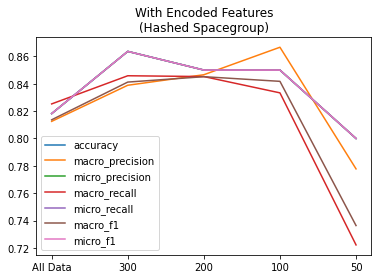















#################
Part 2a


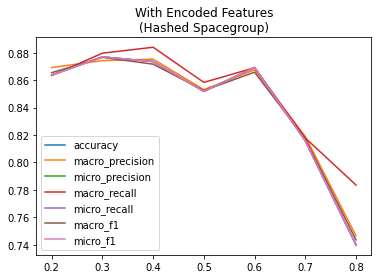















#################
Part 2b


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


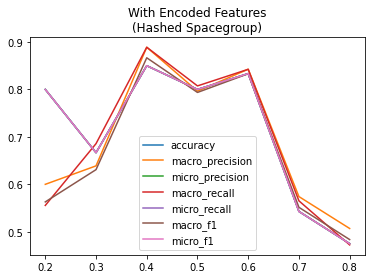

In [102]:
from sklearn.utils import shuffle

def data_reduction(n_components, model, X, y, ts):
  results=[]
  #print("Number of Components: " + str(n_components))
  #print("Model Type: " + type(model).__name__)
  #print("Num Features: " + str(len(feat)))
  print_str = str(n_components) + type(model).__name__
  sc = StandardScaler()
  pca = PCA(n_components=n_components)
  X = sc.fit_transform(X)
  X = pca.fit_transform(X)
  #print("PCA Singular Values: " + str(pca.singular_values_))
  print(); print()
  # 80% training data and 20% testing
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=ts, \
                                                  shuffle=True, random_state=1)
  model.fit(Xtrain,ytrain.values.ravel())
  yp = model.predict(Xtest)
  accuracy=accuracy_score(yp,ytest)
  macro_precision=precision_score(yp,ytest,average='macro')
  micro_precision=precision_score(yp,ytest,average='micro')
  macro_recall=recall_score(yp,ytest,average='macro')
  micro_recall=recall_score(yp,ytest,average='micro')
  macro_f1=f1_score(yp,ytest,average='macro')
  micro_f1=f1_score(yp,ytest,average='micro')
  results.append([titles[i],accuracy,macro_precision,micro_precision, \
                  macro_recall,micro_recall,macro_f1,micro_f1])
  return results


model_LR = LogisticRegression(max_iter=10000)
X = data_rebalanced[ord_feat]
y = data_rebalanced[labels]

X,y = shuffle(X,y,random_state=2)
r1 = data_reduction(7, model_LR, X, y, 0.2)
X,y = shuffle(X,y,random_state=3)
r2 = data_reduction(7, model_LR, X[-300:], y[-300:], 0.2)
X,y = shuffle(X,y,random_state=4)
r3 = data_reduction(7, model_LR, X[-200:], y[-200:], 0.2)
X,y = shuffle(X,y,random_state=5)
r4 = data_reduction(7, model_LR, X[-100:], y[-100:], 0.2)
X,y = shuffle(X,y,random_state=6)
r5 = data_reduction(7, model_LR, X[-50:], y[-50:], 0.2)

r = [r1[0][-7:],r2[0][-7:],r3[0][-7:],r4[0][-7:],r5[0][-7:]]
n = ["All Data", "300", "200", "100", "50"]

results_df = pd.DataFrame(r, columns=["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])
print("#################")
print("Part 1")
plt.figure()
plt.title(titles[i])
plt.plot(n,results_df["accuracy"])
plt.plot(n,results_df["macro_precision"])
plt.plot(n,results_df["micro_precision"])
plt.plot(n,results_df["macro_recall"])
plt.plot(n,results_df["micro_recall"])
plt.plot(n,results_df["macro_f1"])
plt.plot(n,results_df["micro_f1"])
plt.legend(["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])
plt.show()

X,y = shuffle(X,y,random_state=10)
r1 = data_reduction(7, model_LR, X, y, 0.2)
X,y = shuffle(X,y,random_state=13)
r2 = data_reduction(7, model_LR, X, y, 0.3)
X,y = shuffle(X,y,random_state=14)
r3 = data_reduction(7, model_LR, X, y, 0.4)
X,y = shuffle(X,y,random_state=15)
r4 = data_reduction(7, model_LR, X, y, 0.5)
X,y = shuffle(X,y,random_state=16)
r5 = data_reduction(7, model_LR, X, y, 0.6)
X,y = shuffle(X,y,random_state=17)
r6 = data_reduction(7, model_LR, X, y, 0.7)
X,y = shuffle(X,y,random_state=18)
r7 = data_reduction(7, model_LR, X, y, 0.8)

r = [r1[0][-7:],r2[0][-7:],r3[0][-7:],r4[0][-7:],r5[0][-7:],r6[0][-7:],r7[0][-7:]]
n = ["0.2", "0.3", "0.4", "0.5", "0.6", "0.7","0.8"]

results_df = pd.DataFrame(r, columns=["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])

print("#################")
print("Part 2a")
plt.figure()
plt.title(titles[i])
plt.plot(n,results_df["accuracy"])
plt.plot(n,results_df["macro_precision"])
plt.plot(n,results_df["micro_precision"])
plt.plot(n,results_df["macro_recall"])
plt.plot(n,results_df["micro_recall"])
plt.plot(n,results_df["macro_f1"])
plt.plot(n,results_df["micro_f1"])
plt.legend(["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])
plt.show()

X,y = shuffle(X,y,random_state=20)
r1 = data_reduction(7, model_LR, X[-50:], y[-50:], 0.2)
X,y = shuffle(X,y,random_state=23)
r2 = data_reduction(7, model_LR, X[-50:], y[-50:], 0.3)
X,y = shuffle(X,y,random_state=24)
r3 = data_reduction(7, model_LR, X[-50:], y[-50:], 0.4)
X,y = shuffle(X,y,random_state=25)
r4 = data_reduction(7, model_LR, X[-50:], y[-50:], 0.5)
X,y = shuffle(X,y,random_state=26)
r5 = data_reduction(7, model_LR, X[-50:], y[-50:], 0.6)
X,y = shuffle(X,y,random_state=27)
r6 = data_reduction(7, model_LR, X[-50:], y[-50:], 0.7)
X,y = shuffle(X,y,random_state=28)
r7 = data_reduction(7, model_LR, X[-50:], y[-50:], 0.8)

r = [r1[0][-7:],r2[0][-7:],r3[0][-7:],r4[0][-7:],r5[0][-7:],r6[0][-7:],r7[0][-7:]]
n = ["0.2", "0.3", "0.4", "0.5", "0.6", "0.7","0.8"]

results_df = pd.DataFrame(r, columns=["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])

print("#################")
print("Part 2b")
plt.figure()
plt.title(titles[i])
plt.plot(n,results_df["accuracy"])
plt.plot(n,results_df["macro_precision"])
plt.plot(n,results_df["micro_precision"])
plt.plot(n,results_df["macro_recall"])
plt.plot(n,results_df["micro_recall"])
plt.plot(n,results_df["macro_f1"])
plt.plot(n,results_df["micro_f1"])
plt.legend(["accuracy", "macro_precision", \
      "micro_precision", "macro_recall","micro_recall","macro_f1","micro_f1"])
plt.show()



